## What are image embeddings?

##### An image embedding is a a vector of numbers that represent an image in a high dimensional space. For example an image of a cat cat be represented as a vector of 384 numbers, such as [0.21, -0.34, ..., 0.05]. Each of these number in the vector corresponds to a feature or an attribute of the image, such as color, shape, texture etc. The vector capture the essence of the image and allow us to compare it with other images using mathematical operations.

##### Image embeddinds are also called image features or image discriptors. They are derived from image models that have been trained on a large datasets of images to learn how to extract meaningful information from them. There are different types of image models, such as CNNs, Auto Encoders, GANs. Each type of model has its own pros and cons depending on the task and data 

## Why are image embeddings important?


#####  Image embeddings are important because they enable us to perform various tasks that require understanding the content and the context of images. Some examples of these tasks are:

- ##### ***Image search***: Given a query image or a text description, we can find similar images in a database or on the web using image embeddings. For example, we can search for images of flowers that look like roses or images of cars that are red.

- ##### ***Image classification***: Given an image, we can assign it to one or more categories based on its content using image embeddings. For example, we can classify an image as animal, plant, or mineral or as cat, dog, or bird.

- ##### ***Image retrieval***: Given a set of images, we can rank them according to their relevance or similarity to a query using image embeddings. For example, we can retrieve images of landscapes that are most similar to a given image or images of products that are most relevant to a user’s preference.

- ##### ***Image similarity***: Given two images, we can measure how similar or different they are using image embeddings. For example, we can compare two images of faces and determine if they belong to the same person or not.

##### These tasks are useful for many applications and domains, such as e-commerce, social media, education, entertainment, security, etc. Image embeddings allow us to leverage the vast amount of visual information available on the web and in our devices and make sense of it.

### How to  generate image embeddings in python?

##### There are many way to generate image embedding using python and some open source libraries. In this section, we will see how to use two pupular libraries:
- **scikit-learn** 
- **Huggingface Transformers**.

### Embedding using scikit-learn
##### Scikit-learn is a library for machine learning in Python that provides various tools for data analysis and modeling. One of the tools that scikit-learn provide that is PCA-Principle Component Analysis. It is also a technique for ***dimensionality reduction***. PCA can be used to generate linear image embeddings by projecting high-dimessional images into lower dimension subspace that preserve most of the varience in the data.

##### Code start here

In [35]:
# !pip install -r requirements.txt

(444, 710, 3)


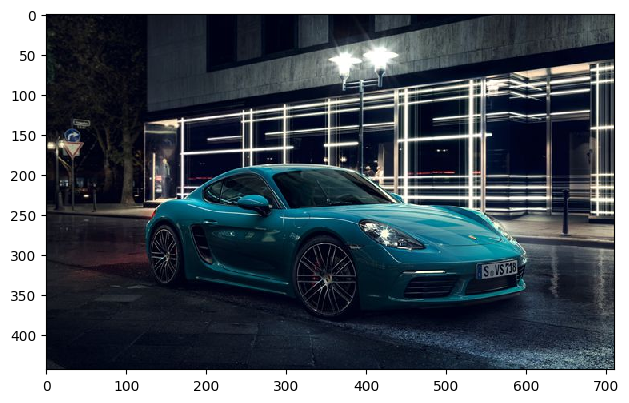

In [16]:
import numpy as np
import skimage.io as io
from sklearn.decomposition import PCA

# Load the image
img = io.imread('images/car1.jpg')
# print the shape of the image
print(img.shape)
# plot the image
io.imshow(img)

/media/iot/Others/faisal/run/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


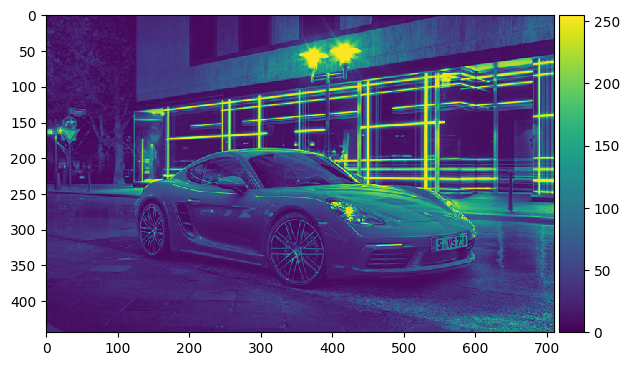

In [12]:
# convert the image to grayscale
img_gray = np.mean(img, axis=2)
# plot the grayscale image
io.imshow(img_gray)

(315240,)
[  6.66666667   7.66666667   6.66666667 ...  65.         120.
 110.        ]


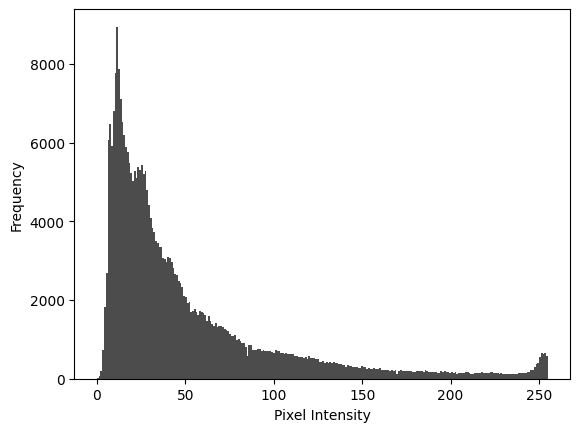

In [15]:
# flatten the image
img_gray_flatten = img_gray.reshape(-1)
print(img_gray_flatten.shape)
print(img_gray_flatten)
# plot the histogram
import matplotlib.pyplot as plt
plt.hist(img_gray_flatten, bins=256, color='black', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [19]:
# stack all the image into 2D array
X = np.stack([img_gray_flatten], axis=1)
X

array([[  6.66666667],
       [  7.66666667],
       [  6.66666667],
       ...,
       [ 65.        ],
       [120.        ],
       [110.        ]])

In [28]:
# create a PCA model with 384 components
pca = PCA(n_components=1)
pca


PCA(n_components=1)

In [29]:
# fit the model to the data
pca.fit(X)

PCA(n_components=1)

In [25]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming X is your data
pca = PCA()
pca.fit(X)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# You can choose a threshold to decide the optimal number of components, for example 0.95
components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print('The optimal number of components is:', components)

The optimal number of components is: 1


In [32]:
# transform the data in to 1d vector
X_embedded = pca.transform(X)
X_embedded

array([[-45.14059447],
       [-44.14059447],
       [-45.14059447],
       ...,
       [ 13.19273887],
       [ 68.19273887],
       [ 58.19273887]])

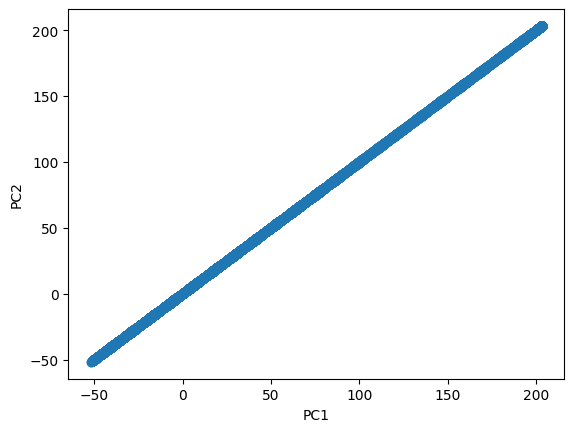

In [33]:
# plot the transformed data 
plt.scatter(X_embedded, X_embedded, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### Huggingface Transformers

##### Huggingface transformers is a library for natural language processing ***(NLP)*** in python that provide various models and pipelines for text analysis and genaration. One of the models that Huggingface transformers offer is ***Contrastive Language-Image Pretraining (CLIP)*** which is a ***vision-language model*** that can generate image embeddings from any image using a pretrained convolutional neural network from OpenAI. Clip can be used to generate deep image embeddings that are robust and versatile for many task. 

##### Code starts here

In [36]:
# import necessary libraries
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel


In [37]:
# load the model and the processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


config.json: 100%|██████████| 4.19k/4.19k [00:00<00:00, 4.46MB/s]
pytorch_model.bin: 100%|██████████| 605M/605M [00:57<00:00, 10.5MB/s] 
/media/iot/Others/faisal/run/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
tokenizer_config.json: 100%|██████████| 568/568 [00:00<00:00, 1.09MB/s]
vocab.json: 100%|██████████| 862k/862k [00:00<00:00, 1.73MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 12.5MB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:01<00:00, 2.08MB/s]
special_tokens_map.json: 100%|██████████| 389/389 [00:00<00:00, 759kB/s]


In [42]:
# load, plot and preprocess the image
image = Image.open("images/car1.jpg")


# preprocess the image
inputs = processor(images=image, return_tensors="pt", padding=True)
inputs

{'pixel_values': tensor([[[[-1.4857, -1.4857, -1.5149,  ..., -1.3251, -1.2375, -1.2375],
          [-1.4711, -1.4711, -1.5149,  ..., -1.3397, -1.2229, -1.2521],
          [-1.4857, -1.4857, -1.4857,  ..., -1.2959, -1.1937, -1.2667],
          ...,
          [-1.7339, -1.7631, -1.7485,  ..., -0.7850, -0.8872, -1.0477],
          [-1.7047, -1.7047, -1.7193,  ..., -1.0623, -0.9893, -0.9456],
          [-1.7047, -1.7193, -1.7339,  ..., -1.1937, -1.1207, -1.2813]],

         [[-1.3769, -1.3769, -1.4069,  ..., -1.1968, -1.1068, -1.1218],
          [-1.3619, -1.3619, -1.4069,  ..., -1.2118, -1.0918, -1.1368],
          [-1.3769, -1.3769, -1.3769,  ..., -1.1668, -1.0617, -1.1368],
          ...,
          [-1.6020, -1.6320, -1.6170,  ..., -0.3114, -0.4164, -0.5815],
          [-1.5720, -1.5720, -1.5870,  ..., -0.6115, -0.5065, -0.4614],
          [-1.5720, -1.5870, -1.6020,  ..., -0.7466, -0.6265, -0.8066]],

         [[-0.9683, -0.9683, -0.9967,  ..., -0.8688, -0.7834, -0.7692],
          [-0

In [88]:
# Specify the input ids for one image
input_text = "a car"  # Placeholder text (modify if desired)
encoded_text = processor(text=input_text, return_tensors="pt")  # Encode text

outputs = model(**inputs, input_ids=encoded_text["input_ids"])
outputs



CLIPOutput(loss=None, logits_per_image=tensor([[23.1325]], grad_fn=<TBackward0>), logits_per_text=tensor([[23.1325]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 1.6010e-02, -3.3595e-03,  6.7992e-03, -2.5523e-03,  6.3550e-03,
          2.0125e-02,  1.4348e-02, -7.7784e-02,  1.3505e-02,  3.0583e-02,
          7.1849e-03, -1.7756e-02,  9.5270e-03, -4.3906e-03,  2.3491e-02,
         -9.2236e-03,  3.6677e-02,  5.6287e-03, -2.7720e-02,  7.1727e-03,
          5.1198e-02,  8.9268e-03,  2.4103e-02, -5.0096e-03, -3.7323e-02,
          2.7331e-02,  1.4245e-02,  1.4800e-02, -1.2120e-02,  1.3274e-02,
          4.5786e-03, -2.0493e-02,  1.9197e-02,  1.0078e-02, -1.8329e-02,
         -2.3018e-02, -2.0209e-02,  1.9435e-02,  1.0195e-02, -1.3204e-03,
          2.0166e-02,  2.3479e-02, -6.8032e-03, -1.4614e-02,  1.5166e-02,
          1.9221e-02,  2.4637e-02,  6.4566e-03,  8.3465e-03, -1.9813e-02,
         -1.5918e-03, -2.6759e-03,  3.1616e-02, -3.2936e-02, -3.4752e-02,
         -3.2661e-02,  3.0621e-

In [89]:
# extract the image emdedding
image_embedding = outputs.image_embeds
image_embedding

tensor([[ 6.0070e-02, -5.2628e-02, -5.0349e-02, -1.8028e-02,  1.6869e-02,
         -3.3236e-02,  2.6744e-02, -1.9480e-02,  2.9182e-02, -3.7688e-02,
          4.1661e-02,  1.2672e-02,  8.2641e-03, -4.1780e-02,  9.9410e-02,
          3.6240e-02,  1.0915e-01, -2.1919e-02,  2.9367e-02, -5.6404e-03,
         -2.9914e-03, -2.6989e-02,  1.9301e-02,  4.1163e-02, -8.8902e-02,
         -4.3245e-03,  6.2175e-03, -3.5811e-02, -4.2375e-03, -4.7566e-02,
          9.5531e-03, -5.3680e-02, -3.3135e-02, -1.7924e-02,  2.0107e-02,
          3.5545e-02,  4.4586e-03, -2.3437e-02,  1.8701e-02,  2.0712e-01,
         -4.8823e-03,  5.7976e-02,  2.9668e-02, -2.4264e-02,  5.4330e-02,
         -2.9976e-02,  1.6213e-02, -1.1261e-03,  5.5365e-02, -1.0311e-02,
         -1.2775e-02, -4.7696e-04, -2.9470e-02, -3.4312e-03, -3.1909e-02,
          9.2388e-03, -4.6486e-02, -1.4012e-02, -3.9313e-02, -8.7632e-02,
          3.1022e-03, -3.1248e-02, -6.3293e-02,  5.6632e-03,  1.3068e-03,
          2.9755e-02,  4.1862e-02, -9.

In [90]:
# extract the text embedding
text_embedding = outputs.text_embeds
text_embedding

tensor([[ 1.6010e-02, -3.3595e-03,  6.7992e-03, -2.5523e-03,  6.3550e-03,
          2.0125e-02,  1.4348e-02, -7.7784e-02,  1.3505e-02,  3.0583e-02,
          7.1849e-03, -1.7756e-02,  9.5270e-03, -4.3906e-03,  2.3491e-02,
         -9.2236e-03,  3.6677e-02,  5.6287e-03, -2.7720e-02,  7.1727e-03,
          5.1198e-02,  8.9268e-03,  2.4103e-02, -5.0096e-03, -3.7323e-02,
          2.7331e-02,  1.4245e-02,  1.4800e-02, -1.2120e-02,  1.3274e-02,
          4.5786e-03, -2.0493e-02,  1.9197e-02,  1.0078e-02, -1.8329e-02,
         -2.3018e-02, -2.0209e-02,  1.9435e-02,  1.0195e-02, -1.3204e-03,
          2.0166e-02,  2.3479e-02, -6.8032e-03, -1.4614e-02,  1.5166e-02,
          1.9221e-02,  2.4637e-02,  6.4566e-03,  8.3465e-03, -1.9813e-02,
         -1.5918e-03, -2.6759e-03,  3.1616e-02, -3.2936e-02, -3.4752e-02,
         -3.2661e-02,  3.0621e-02, -5.9935e-03, -4.2137e-02, -3.1318e-02,
          2.0559e-02, -1.8632e-02, -1.1550e-02,  2.6685e-02, -2.2484e-02,
          1.9693e-02,  1.3368e-02,  5.

In [94]:
# claculate the similarity between the image and the text
# use cosine similarity and euclidean distance
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# calculate the cosine similarity
cosine_similar =  cosine_similarity(image_embedding.detach().numpy(), text_embedding.detach().numpy())

# calculate the euclidean distance
euclidean_distance = euclidean_distances(image_embedding.detach().numpy(), text_embedding.detach().numpy())

# print the similarity

print("Cosine Similarity: ", cosine_similar)
print("Euclidean Distance: ", euclidean_distance)

Cosine Similarity:  [[0.2313245]]
Euclidean Distance:  [[1.2398995]]


##### explain the cosine similarity and euclidean distance
##### The cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle. It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.


In [95]:
# explain the cosine similarity and euclidean distance
# The cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle. It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.


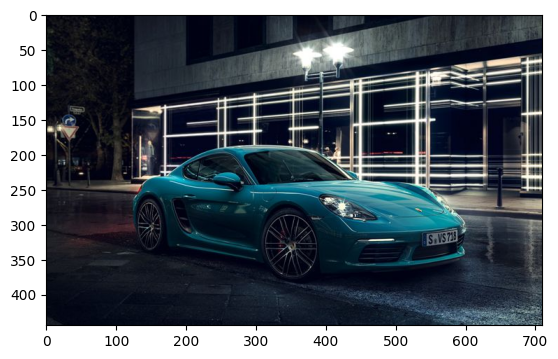

The text is: a bird


In [73]:
# visualize the image and the text 
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()
print("The text is:", input_text)



In [75]:
# visualize the embeddings of the image and the text
image_embedding = outputs.logits_per_image
text_embedding = model.get_text_embedding(encoded_text)
print("The image embedding is:", image_embedding)
print("The text embedding is:", text_embedding)



AttributeError: 'CLIPModel' object has no attribute 'get_text_embedding'